## Premier League Crosses

### Imports and Fonts

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib.patches import RegularPolygon
import matplotlib.patches as mpatches
from matplotlib import cm
import numpy as np
from matplotlib import cm
from highlight_text import fig_text, ax_text
from ast import literal_eval

from mplsoccer import Pitch, VerticalPitch, lines

from PIL import Image
import urllib
import os

In [261]:
font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if (y.split(".")[-1] == "ttf") or (y.split(".")[-1] == "otf"):
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'DM Sans'

### Reading and cleaning the data

In [262]:
data = pd.read_csv('data/2022_2023_premier_league.csv', index_col=0, low_memory=False)
data['qualifiers'] = [literal_eval(x) for x in data['qualifiers']]
data['satisfied_events_types'] = [literal_eval(x) for x in data['satisfied_events_types']]
team_map = pd.read_csv('data/team_mapping.csv', encoding='utf-8')

Now we filter only those events related to crosses.

In [263]:
data_crosses = data.copy()
data_crosses['is_cross'] = False
data['is_assist'] = False
for index, row in enumerate(data_crosses['satisfied_events_types']):
    if ('passCrossInaccurate' in row or 'passCrossAccurate' in row) and ('passCorner' not in row):
        data_crosses.at[index, 'is_cross'] = True
        if 'assist' in row:
            data_crosses.at[index, 'is_assist'] = True

In [264]:
data_crosses = data_crosses[data_crosses['is_cross']].reset_index(drop=True)
data_crosses = pd.merge(data_crosses, team_map[['team_id', 'fotmob_id']], how='left', on='team_id')
data_crosses

event_id  minute  second  team_id     x     y  expanded_minute  \
0     2.493198e+09       6    27.0      189  83.9   9.1                6   
1     2.493199e+09       9    34.0       30  97.5  16.1                9   
2     2.493200e+09      16     0.0      189  90.2  87.8               16   
3     2.493203e+09      27    28.0      189  68.3  78.3               27   
4     2.493204e+09      28    39.0       30  96.1  83.5               28   
...            ...     ...     ...      ...   ...   ...              ...   
3920  2.494468e+09      66    17.0       30  88.4  10.8               69   
3921  2.494472e+09      72     1.0       30  78.9  90.9               75   
3922  2.494477e+09      78    21.0       30  90.9  18.6               81   
3923  2.494489e+09      92    49.0       30  94.5  95.2               95   
3924  2.494489e+09      93     1.0       30  80.6  90.4               96   

          period  outcome_type  \
0      FirstHalf  Unsuccessful   
1      FirstHalf  Unsuccessful   
2      FirstHalf  Unsuccessful   
3      FirstHalf  Unsuccessful   
4      FirstHalf    Successful   
...          ...           ...   
3920  SecondHalf  Unsuccessful   
3921  SecondHalf  Unsuccessful   
3922  SecondHalf  Unsuccessful   
3923  SecondHalf  Unsuccessful   
3924  SecondHalf  Unsuccessful   

                                             qualifiers  ... event_type  \
0     [{'RightFoot': True}, {'Zone': 'Right'}, {'Cro...  ...       Pass   
1     [{'PassEndX': '89.8'}, {'Cross': True}, {'Leng...  ...       Pass   
2     [{'Cross': True}, {'Length': '1.8'}, {'PassEnd...  ...       Pass   
3     [{'Length': '31.9'}, {'PassEndX': '92.4'}, {'F...  ...       Pass   
4     [{'PassEndY': '26.4'}, {'Angle': '4.7'}, {'Pas...  ...       Pass   
...                                                 ...  ...        ...   
3920  [{'Cross': True}, {'OppositeRelatedEvent': '53...  ...       Pass   
3921  [{'OppositeRelatedEvent': '594'}, {'Cross': Tr...  ...       Pass   
3922  [{'PassEndX': '91.6'}, {'Length': '16.3'}, {'A...  ...       Pass   
3923  [{'PassEndX': '93.8'}, {'Length': '24.3'}, {'L...  ...       Pass   
3924  [{'Length': '24.2'}, {'PassEndX': '90.7'}, {'C...  ...       Pass   

      pass_recipient  team_name           match_date  match_id  \
0                NaN  Brentford  2022-12-26T12:30:00   1640836   
1                NaN  Tottenham  2022-12-26T12:30:00   1640836   
2                NaN  Brentford  2022-12-26T12:30:00   1640836   
3                NaN  Brentford  2022-12-26T12:30:00   1640836   
4       Matt Doherty  Tottenham  2022-12-26T12:30:00   1640836   
...              ...        ...                  ...       ...   
3920             NaN  Tottenham  2023-01-01T14:00:00   1640851   
3921             NaN  Tottenham  2023-01-01T14:00:00   1640851   
3922             NaN  Tottenham  2023-01-01T14:00:00   1640851   
3923             NaN  Tottenham  2023-01-01T14:00:00   1640851   
3924             NaN  Tottenham  2023-01-01T14:00:00   1640851   

                 match_string  is_own_goal  is_cross  is_assist fotmob_id  
0       Brentford - Tottenham          NaN      True        NaN      9937  
1       Brentford - Tottenham          NaN      True        NaN      8586  
2       Brentford - Tottenham          NaN      True        NaN      9937  
3       Brentford - Tottenham          NaN      True        NaN      9937  
4       Brentford - Tottenham          NaN      True        NaN      8586  
...                       ...          ...       ...        ...       ...  
3920  Tottenham - Aston Villa          NaN      True        NaN      8586  
3921  Tottenham - Aston Villa          NaN      True        NaN      8586  
3922  Tottenham - Aston Villa          NaN      True        NaN      8586  
3923  Tottenham - Aston Villa          NaN      True        NaN      8586  
3924  Tottenham - Aston Villa          NaN      True        NaN      8586  

[3925 rows x 35 columns]

In [265]:
test_df = data_crosses[(data_crosses['team_name'] == 'Arsenal')]

### The Viz

We first do an example for Arsenal so we can replicate it for any team.

(-0.5, 190.5, 190.5, -0.5)

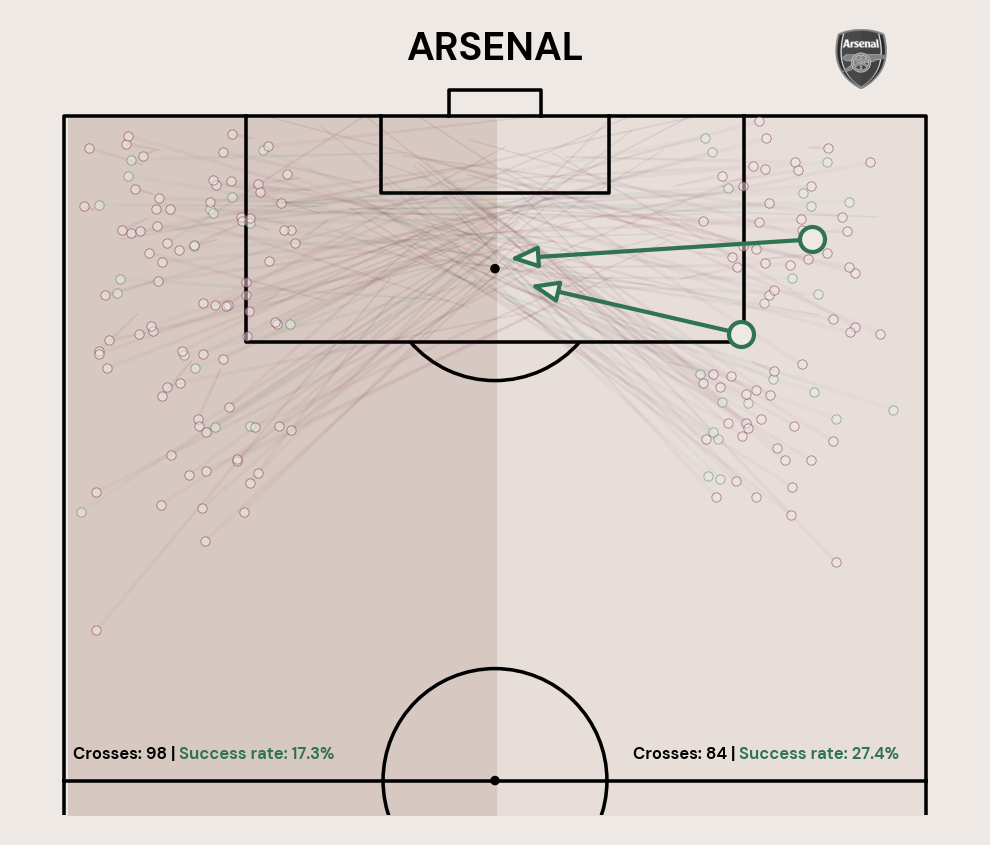

In [266]:
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='black',
    half=True
)
pitch.draw(ax = ax)

# -- Split successful corners from unsuccessful attempts.
assists = test_df[test_df['is_assist'] == True]
others = test_df[test_df['is_assist'] != True]
other_s = test_df[test_df['outcome_type'] == 'Successful']
other_u = test_df[test_df['outcome_type'] != 'Successful']

lines(other_s.y, other_s.x, other_s.end_y, other_s.end_x, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color='#307351')

lines(other_u.y, other_u.x, other_u.end_y, other_u.end_x, 
    ax=ax, comet=True, alpha_start=0.01, alpha_end=0.05, lw=.3, transparent=True, color='#70163C')

for index, a in assists.iterrows():
    # ax.plot([a['y'], a['end_y']], [a['x'], a['end_x']], lw=1, color='#307351')
    pass_arrow = mpatches.FancyArrowPatch((a.y, a.x), (a.end_y, a.end_x), ec='#307351',
                                        fc='#efe9e6',arrowstyle='-|>,head_length=5.6,head_width=2.2', zorder=4)
    ax.add_patch(pass_arrow)

ax.scatter(assists['y'], assists['x'], marker='o', fc=ax.get_facecolor(), ec='#307351', zorder=4)
ax.scatter(other_s['y'], other_s['x'], marker='o', fc=ax.get_facecolor(), ec='#307351', zorder=3, alpha=.5, s=5, lw=0.2)
ax.scatter(other_u['y'], other_u['x'], marker='o', fc=ax.get_facecolor(), ec='#70163C', zorder=3, alpha=.5, s=5, lw=0.2)

# Separate left from right hand side
# -- Count which side had most crosses:
left_side = test_df[test_df['y'] > 50].shape[0]
right_side = test_df[test_df['y'] < 50].shape[0]
left_success = other_s[other_s['y'] > 50].shape[0]
right_success = other_s[other_s['y'] < 50].shape[0]

if right_side > left_side:
    color_left = '#e7deda'
    color_right = '#d7c8c1'
else:
    color_right = '#e7deda'
    color_left = '#d7c8c1'

ax.fill_between(
    x=[0.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_right, zorder=-1
)
ax.fill_between(
    x=[99.35,50], y1=ax.get_ylim()[0], y2=99.65,
    color=color_left, zorder=-1
)

# -- Annotations
ax_text(
    x=99, y=52,
    s=f'Crosses: {left_side:.0f} | <Success rate: {left_success/left_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':'#307351'}],
    size=4,
    ax=ax
)

ax_text(
    x=34, y=52,
    s=f'Crosses: {right_side:.0f} | <Success rate: {right_success/right_side:.1%}>',
    ha='left', va='center',
    weight='bold', textalign='top',
    highlight_textprops=[{'color':'#307351'}],
    size=4,
    ax=ax
)

ax.annotate(
    xy=(50,105),
    text=f"{test_df['team_name'].iloc[0].upper()}",
    size=9.5,
    color='black',
    ha='center',
    va='center',
    weight='bold',
    annotation_clip=False
)

# -- Add Logo
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((11,102))
ax_size = 0.05
image_ax = fig.add_axes(
    [ax_coords[0], ax_coords[1], ax_size, ax_size],
    fc='None'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{test_df["fotmob_id"].iloc[0]:.0f}.png')).convert('LA')
image_ax.imshow(club_icon)
image_ax.axis('off')

Now we turn it into a function.

In [267]:
def plot_crosses_by_team_name(ax, team_name):

    plot_df = data_crosses[(data_crosses['team_name'] == team_name)]

    pitch = VerticalPitch(
        pitch_type='opta',
        goal_type='box',
        linewidth=.85,
        line_color='black',
        half=True
    )
    pitch.draw(ax = ax)

    # -- Split successful corners from unsuccessful attempts.
    assists = plot_df[plot_df['is_assist'] == True]
    others = plot_df[plot_df['is_assist'] != True]
    other_s = plot_df[plot_df['outcome_type'] == 'Successful']
    other_u = plot_df[plot_df['outcome_type'] != 'Successful']

    lines(other_s.y, other_s.x, other_s.end_y, other_s.end_x, 
        ax=ax, comet=True, alpha_start=0.04, alpha_end=0.08, lw=.3, transparent=True, color='#307351')

    lines(other_u.y, other_u.x, other_u.end_y, other_u.end_x, 
        ax=ax, comet=True, alpha_start=0.04, alpha_end=0.08, lw=.3, transparent=True, color='#70163C')

    for index, a in assists.iterrows():
        # ax.plot([a['y'], a['end_y']], [a['x'], a['end_x']], lw=1, color='#307351')
        pass_arrow = mpatches.FancyArrowPatch((a.y, a.x), (a.end_y, a.end_x), ec='#307351',
                                            fc='#efe9e6',arrowstyle='-|>,head_length=5.6,head_width=2.2', zorder=4)
        ax.add_patch(pass_arrow)

    ax.scatter(assists['y'], assists['x'], marker='o', fc=ax.get_facecolor(), ec='#307351', zorder=4)
    ax.scatter(other_s['y'], other_s['x'], marker='o', fc=ax.get_facecolor(), ec='#307351', zorder=3, alpha=.65, s=5, lw=0.2)
    ax.scatter(other_u['y'], other_u['x'], marker='o', fc=ax.get_facecolor(), ec='#70163C', zorder=3, alpha=.65, s=5, lw=0.2)

    # Separate left from right hand side
    # -- Count which side had most crosses:
    left_side = plot_df[plot_df['y'] > 50].shape[0]
    right_side = plot_df[plot_df['y'] < 50].shape[0]
    left_success = other_s[other_s['y'] > 50].shape[0]
    right_success = other_s[other_s['y'] < 50].shape[0]

    if right_side > left_side:
        color_left = '#e7deda'
        color_right = '#d7c8c1'
    else:
        color_right = '#e7deda'
        color_left = '#d7c8c1'

    ax.fill_between(
        x=[0.35,50], y1=ax.get_ylim()[0], y2=99.65,
        color=color_right, zorder=-1
    )
    ax.fill_between(
        x=[99.35,50], y1=ax.get_ylim()[0], y2=99.65,
        color=color_left, zorder=-1
    )

    # -- Annotations
    ax_text(
        x=97, y=55,
        s=f'Crosses: {left_side:.0f}\n<Success (%): {left_success/left_side:.1%}>',
        ha='left', va='center',
        weight='bold', textalign='top',
        highlight_textprops=[{'color':'#307351'}],
        size=6,
        ax=ax
    )

    ax_text(
        x=36, y=55,
        s=f'Crosses: {right_side:.0f}\n<Success (%): {right_success/right_side:.1%}>',
        ha='left', va='center',
        weight='bold', textalign='top',
        highlight_textprops=[{'color':'#307351'}],
        size=7,
        ax=ax
    )

    ax.annotate(
        xy=(50,108),
        text=f"{plot_df['team_name'].iloc[0].upper()}",
        size=11.5,
        color='black',
        ha='center',
        va='center',
        weight='bold',
        annotation_clip=False
    )

    return ax

Finally we order the teams by the total number of crosses attempted.

In [268]:
order_teams = data_crosses.groupby(['team_name', 'fotmob_id'])['is_cross'].sum().reset_index().sort_values(by='is_cross', ascending=False).reset_index(drop=True)
order_teams

team_name  fotmob_id  is_cross
0            West Ham       8654       267
1           Tottenham       8586       265
2           Liverpool       8650       245
3              Fulham       9879       244
4            Man City       8456       223
5         Southampton       8466       219
6              Wolves       8602       205
7           Newcastle      10261       202
8           Brentford       9937       198
9   Nottingham Forest      10203       196
10        Aston Villa      10252       195
11           Brighton      10204       193
12            Arsenal       9825       182
13            Chelsea       8455       178
14            Everton       8668       176
15              Leeds       8463       167
16          Leicester       8197       158
17        Bournemouth       8678       147
18            Man Utd      10260       143
19     Crystal Palace       9826       122

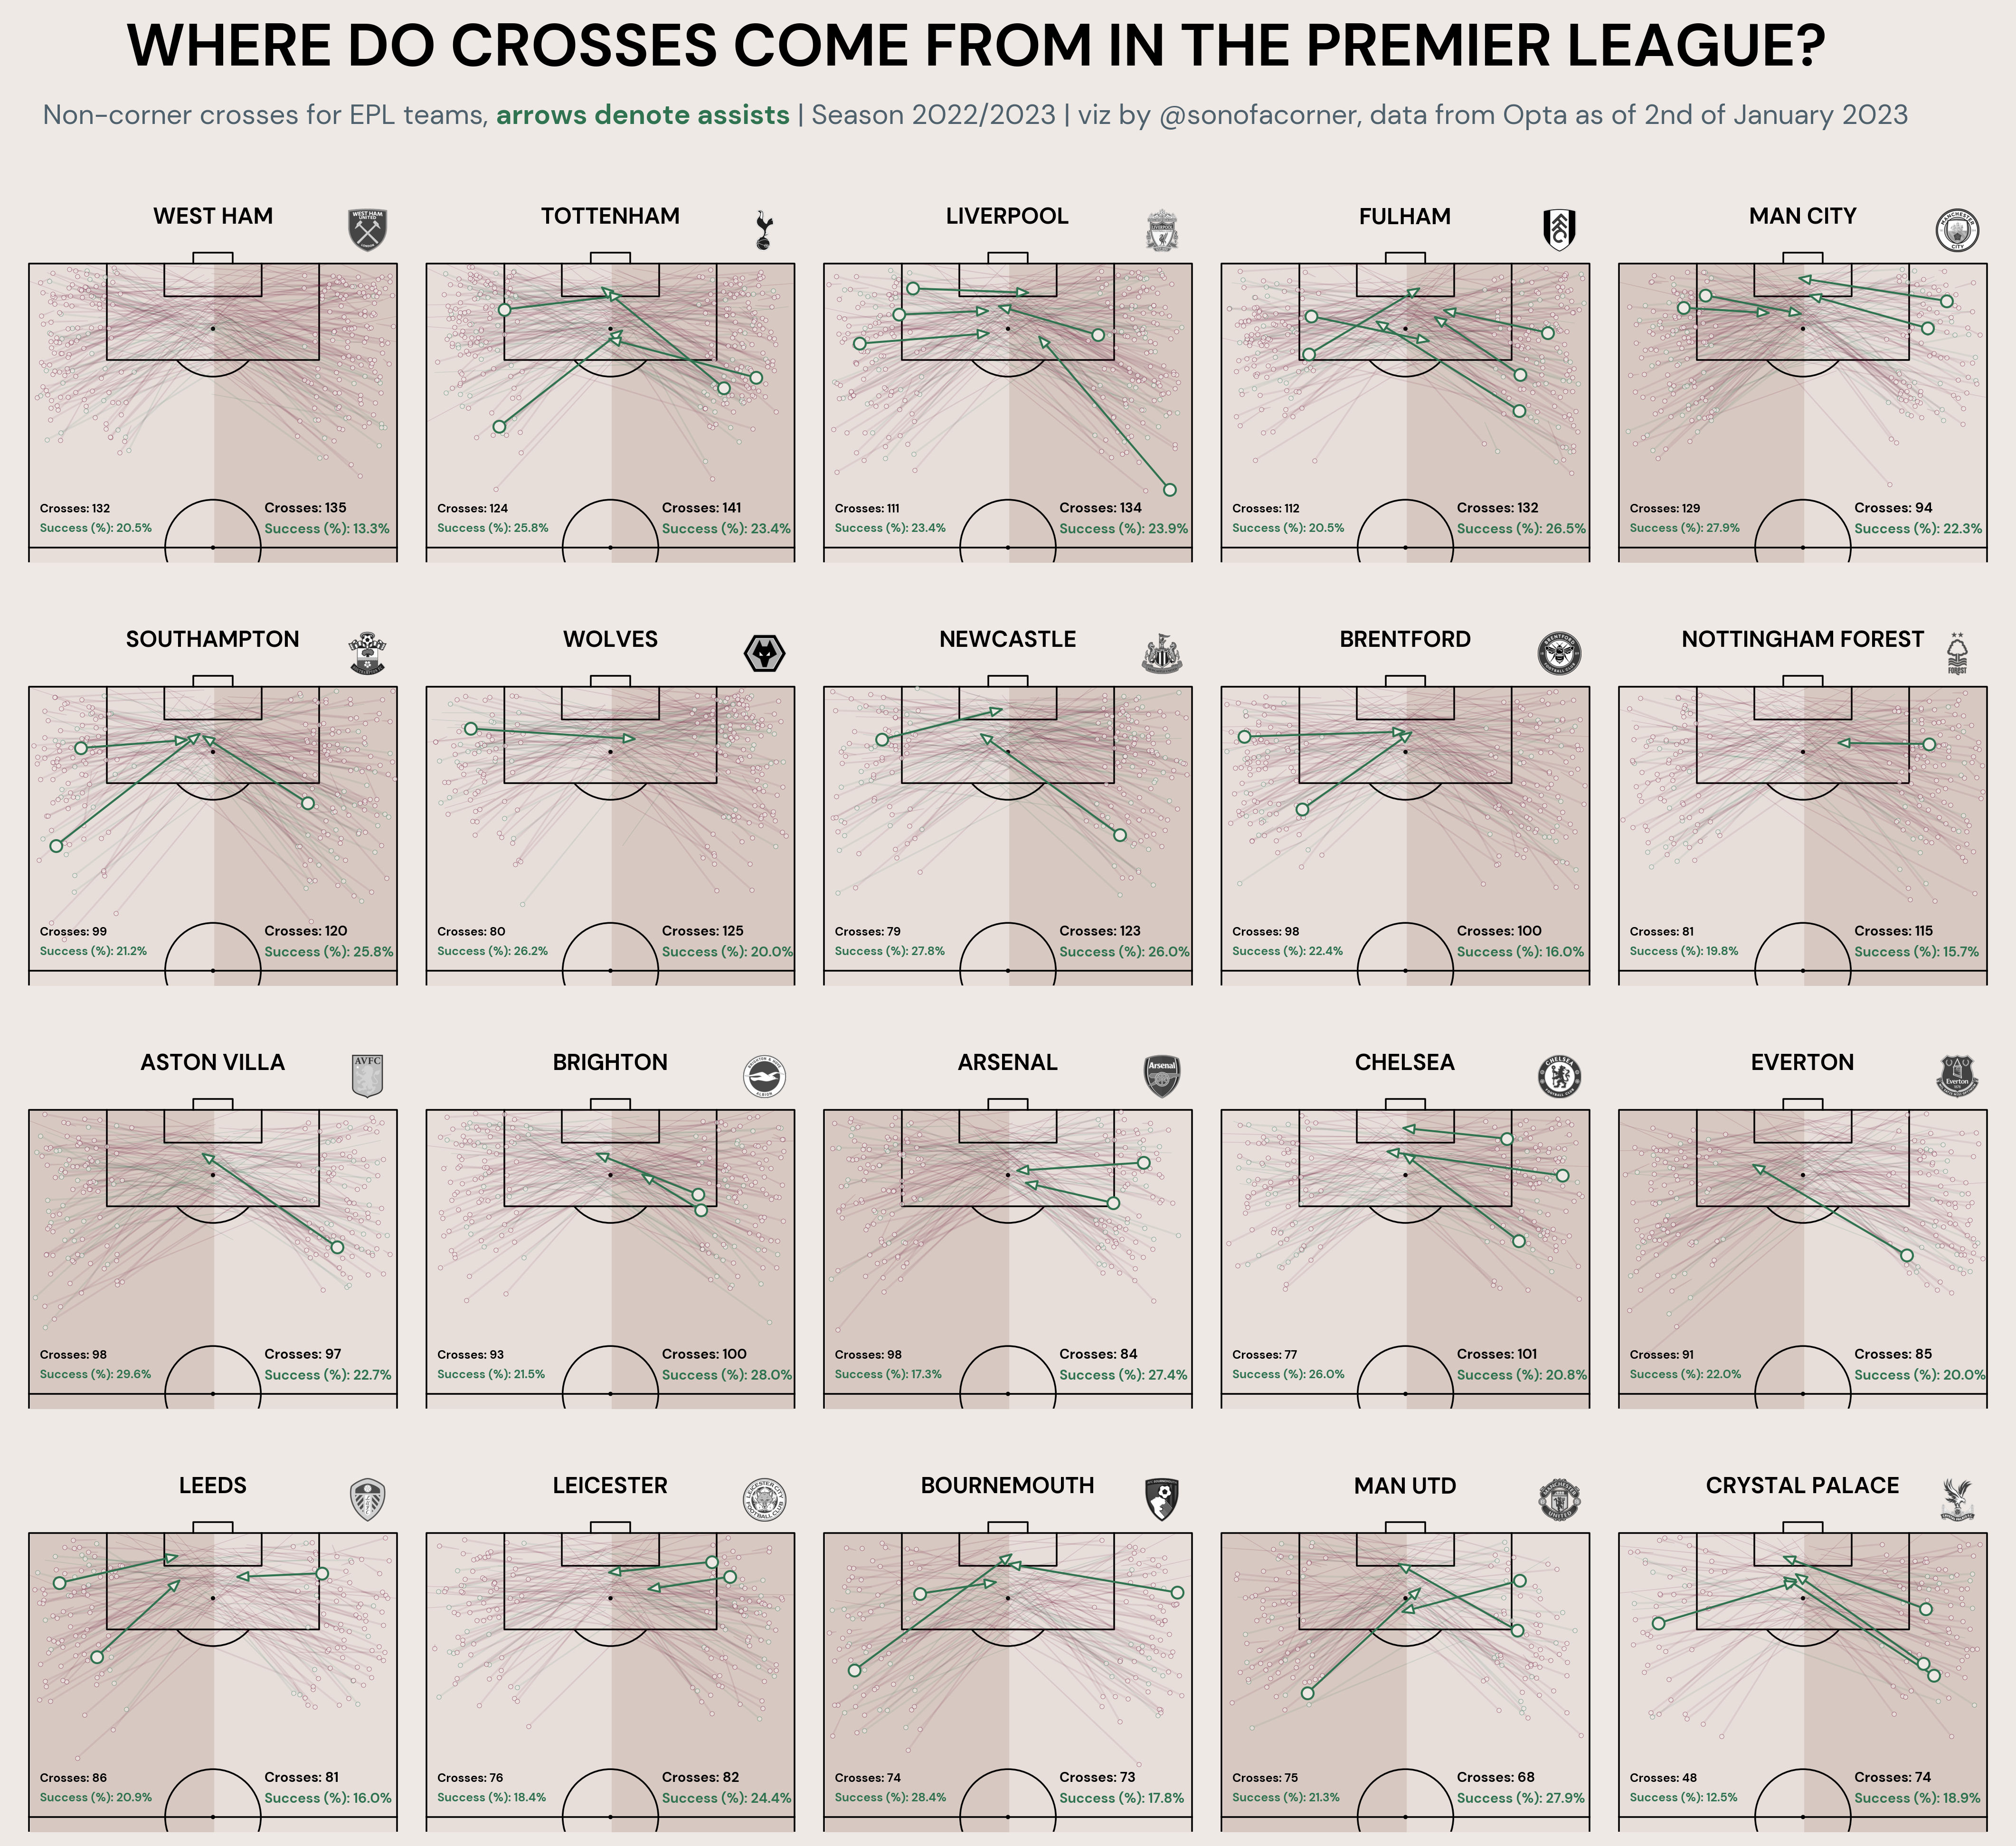

In [269]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(18,18), dpi=300)
axs = np.array(axs)
for index, ax in enumerate(axs.reshape(-1)):
    plot_crosses_by_team_name(ax, order_teams['team_name'].iloc[index])

plt.subplots_adjust(wspace=0, hspace=-.4)
# We add the logos once we've reshaped the figure
for index, ax in enumerate(axs.reshape(-1)):
    # -- Transformation functions
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((14,87))
    ax_size = 0.017
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{order_teams["fotmob_id"].iloc[index]:.0f}.png')).convert('LA')
    image_ax.imshow(club_icon)
    image_ax.axis('off')


fig_text(
    x = 0.5, y = .87, 
    s = "WHERE DO CROSSES COME FROM IN THE PREMIER LEAGUE?",
    va = "bottom", ha = "center",
    fontsize = 30, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.5, y = .85, 
    s = "Non-corner crosses for EPL teams, <arrows denote assists> | Season 2022/2023 | viz by @sonofacorner, data from Opta as of 2nd of January 2023",
    highlight_textprops=[{"weight": "bold", "color": "#307351"}],
	va = "bottom", ha = "center",
	fontsize = 14, color = "#4E616C", font = "DM Sans"
)

plt.savefig(
	"figures/01022023_epl_crosses.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/01022023_epl_crosses_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)